# Soft and Hard Voting

Voting Classifier

Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had 
    the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output 
    class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. 
    Suppose given some input to three models, the prediction probability for class A = (0.33, 0.47, 0.53) and 
    B = (0.25, 0.32, 0.40). So the average for class A is 0.4633 and B is 0.3567, the winner is clearly class 
    A because it had the highest probability averaged by each classifier.

Note: Make sure to include a variety of models to feed a Voting Classifier to be sure that the error made by one might be 
      resolved by the other.


In [19]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('advertising.csv')

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 3:36,0


In [5]:
df.dtypes   # Data Types

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [6]:
df.describe()  # Description About data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
missing= df.isnull().sum()    # Missing Values
print(missing)

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


In [8]:
# Renaming column
df=df.rename({'Daily Time Spent on Site':'daily_time_spent', 
              'Area Income':'area_income', 
              'Daily Internet Usage':'daily_internet_usage',
              'Ad Topic Line':'ad_topic_line', 
              'Clicked on Ad':'clicked_ad'}, axis=1)

<AxesSubplot:>

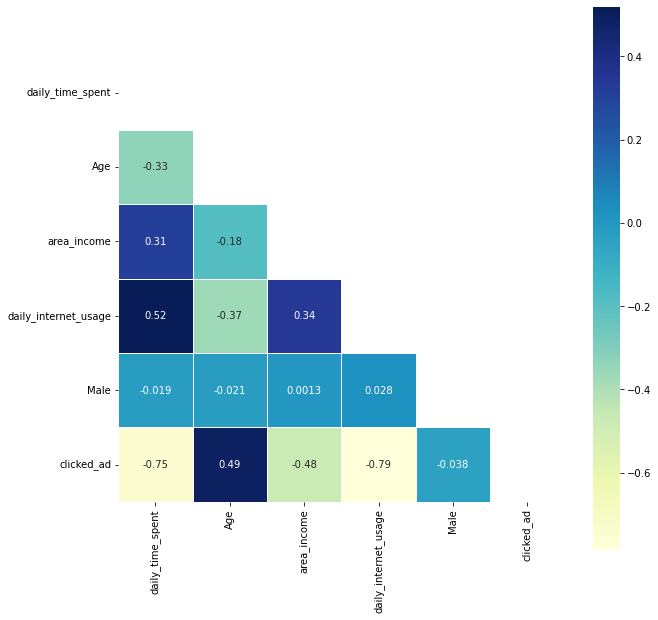

In [21]:
correlation = df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (10, 10))
sns.heatmap(correlation, mask = mask, cmap = 'YlGnBu', annot = True, linewidth = .5, square = True)

In [22]:
# Dependent and Independent variable
x= df[['daily_time_spent', 'Age', 'area_income', 'daily_internet_usage', 'Male']]

y= df['clicked_ad']

In [23]:
# spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.27, random_state= 1000)

## Hard Voting

In [24]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [25]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('\n',clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('\n',clf.__class__.__name__, classification_report(y_test, y_pred))


 LogisticRegression 0.8888888888888888

 LogisticRegression               precision    recall  f1-score   support

           0       0.86      0.94      0.90       139
           1       0.93      0.83      0.88       131

    accuracy                           0.89       270
   macro avg       0.89      0.89      0.89       270
weighted avg       0.89      0.89      0.89       270


 RandomForestClassifier 0.9111111111111111

 RandomForestClassifier               precision    recall  f1-score   support

           0       0.91      0.92      0.91       139
           1       0.91      0.90      0.91       131

    accuracy                           0.91       270
   macro avg       0.91      0.91      0.91       270
weighted avg       0.91      0.91      0.91       270


 SVC 0.7222222222222222

 SVC               precision    recall  f1-score   support

           0       0.68      0.86      0.76       139
           1       0.79      0.58      0.67       131

    accuracy         

## Soft Voting 

In [26]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [27]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('\n',clf.__class__.__name__, classification_report(y_test, y_pred))

LogisticRegression 0.8888888888888888

 LogisticRegression               precision    recall  f1-score   support

           0       0.86      0.94      0.90       139
           1       0.93      0.83      0.88       131

    accuracy                           0.89       270
   macro avg       0.89      0.89      0.89       270
weighted avg       0.89      0.89      0.89       270

RandomForestClassifier 0.9111111111111111

 RandomForestClassifier               precision    recall  f1-score   support

           0       0.91      0.92      0.91       139
           1       0.91      0.90      0.91       131

    accuracy                           0.91       270
   macro avg       0.91      0.91      0.91       270
weighted avg       0.91      0.91      0.91       270

SVC 0.7222222222222222

 SVC               precision    recall  f1-score   support

           0       0.68      0.86      0.76       139
           1       0.79      0.58      0.67       131

    accuracy               

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix\n', clf.__class__.__name__, cm)


 Confusion Matrix
 VotingClassifier [[134   5]
 [  9 122]]


### Conclusion

    From Aboue two Voting Techniques (Hard and Soft)
    Soft Voting classifier Performs well in Comparison to Hard Voting Classifier 

# upcoming Addition
    hyperparameter
    decision tree Classifier